In [ ]:
import numpy as np
import string 
import scipy.io
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
import itertools

def eval(dists,e_dists,model):
    nn_index = np.argmin(dists,axis=1)
    accuracy_on_test = np.mean(nn_index == np.argmax(np.eye(len(target[model])),axis=1))


    b_acc = []
    e_b_acc = []
    for i,j in itertools.combinations(np.arange(len(target[model])), 2):
        right_match = dists[i,i] + dists[j,j]
        wrong_match = dists[i,j] + dists[j,i]
        b_acc.append(right_match < wrong_match)

        e_right_match = e_dists[i,i] + e_dists[j,j]
        e_wrong_match = e_dists[i,j] + e_dists[j,i]
        e_b_acc.append(e_right_match < e_wrong_match)

    #print("binary accuracy: ", np.mean(b_acc)," ", np.mean(e_b_acc))
    return np.mean(b_acc),np.mean(e_b_acc)
    

subject_id = "1"

In [ ]:
subject_file = scipy.io.loadmat('subject_'+subject_id+'.mat') 

In [3]:
sub_id_index = 0
#nTRs
number_of_scans_index = 1
#nvoxels
number_of_voxels = 2
x_dim_index = 3
y_dim_index = 4
z_dim_index = 5
#colToCoord
colToCoord_index = 6
#coordToCol
coordToCol_index = 7
ROInumToName_index = 8
ROInumsToName_3d_index = 9
ROINames_index = 10
voxel_size_index = 11
#the map to the MNI space
matrix_index = 12

In [4]:
area_names_list = np.asarray(subject_file['meta'][0][0][ROINames_index][0])

In [5]:
len(subject_file['meta'][0][0][ROInumToName_index][0])
number_of_voxels = len(subject_file['meta'][0][0][ROInumToName_index][0])

In [6]:
area_names_list[subject_file['meta'][0][0][ROInumToName_index][0]]
number_of_voxels

37913

In [7]:
voxel_area_dic = {}
for i in np.arange(number_of_voxels):
    if subject_file['meta'][0][0][ROInumToName_index][0][i] not in voxel_area_dic.keys():
        voxel_area_dic[subject_file['meta'][0][0][ROInumToName_index][0][i]]=[]
        
    voxel_area_dic[subject_file['meta'][0][0][ROInumToName_index][0][i]].append(i)
    

In [8]:
for key in voxel_area_dic.keys():
    print("area name:", subject_file['meta'][0][0][ROINames_index][0][key][0])
    print("number of voxels:",len(voxel_area_dic[key]))
    
    

area name: Temporal_Pole_Mid_L
number of voxels: 1110
area name: Cerebelum_Crus1_L
number of voxels: 974
area name: Temporal_Pole_Sup_L
number of voxels: 813
area name: Angular_L
number of voxels: 572
area name: Parietal_Sup_L
number of voxels: 765
area name: Supp_Motor_Area_L
number of voxels: 360
area name: Temporal_Mid_L
number of voxels: 348
area name: Precuneus_L
number of voxels: 505
area name: Temporal_Sup_L
number of voxels: 68
area name: Frontal_Sup_L
number of voxels: 654
area name: Frontal_Inf_Tri_L
number of voxels: 302
area name: SupraMarginal_L
number of voxels: 320
area name: Temporal_Inf_L
number of voxels: 254
area name: Occipital_Inf_L
number of voxels: 642
area name: Frontal_Inf_Orb_L
number of voxels: 302
area name: Rolandic_Oper_L
number of voxels: 441
area name: Fusiform_L
number of voxels: 235
area name: Postcentral_L
number of voxels: 688
area name: Frontal_Mid_Orb_L
number of voxels: 637
area name: Cingulum_Ant_L
number of voxels: 516
area name: Parietal_Inf_L


In [9]:
len(subject_file['meta'][0][0][ROINames_index][0])

117

In [22]:
predicted = {}
target = {}

label = "test"

predicted['glove_10'] = np.load("../log_root_cart_sub1/subject_1/word2brain/glove_linear/10/L2_DropIn8H5_wt/predicted_output_"+label+".npy")[0]
target['glove_10'] = np.load("../log_root_cart_sub1/subject_1/word2brain/glove_linear/10/L2_DropIn8H5_wt/target_output_"+label+".npy")

model = 'glove_10'
cosine_dists = distance.cdist(predicted[model],target[model],'cosine')
euc_dists =  distance.cdist(predicted[model],target[model],'euclidean')


predicted['glove'] = np.load("../log_root_cart_sub1/subject_1/word2brain/glove_linear/1/L2_DropIn8H5_wt/predicted_output_"+label+".npy")[0]
target['glove'] = np.load("../log_root_cart_sub1/subject_1/word2brain/glove_linear/1/L2_DropIn8H5_wt/target_output_"+label+".npy")

model = 'glove'
cosine_dists = distance.cdist(predicted[model],target[model],'cosine')
euc_dists =  distance.cdist(predicted[model],target[model],'euclidean')
print(eval(cosine_dists,euc_dists,model))
    
predicted['char_word'] = np.load("../log_root_cart_sub1/subject_1/word2brain/char_word_linear/1/L2_DropIn7H5/predicted_output_"+label+".npy")[0]
target['char_word'] = np.load("../log_root_cart_sub1/subject_1/word2brain/char_word_linear/1/L2_DropIn7H5/target_output_"+label+".npy")
model = 'char_word'
cosine_dists = distance.cdist(predicted[model],target[model],'cosine')
euc_dists =  distance.cdist(predicted[model],target[model],'euclidean')
print(eval(cosine_dists,euc_dists,model))

predicted['word'] = np.load("../log_root_cart_sub1/subject_1/word2brain/word_linear/1/linear_map/predicted_output_"+label+".npy")[0]
target['word'] = np.load("../log_root_cart_sub1/subject_1/word2brain/word_linear/1/linear_map/target_output_"+label+".npy")
model = 'word'
cosine_dists = distance.cdist(predicted[model],target[model],'cosine')
euc_dists =  distance.cdist(predicted[model],target[model],'euclidean')
print(eval(cosine_dists,euc_dists,model))

predicted['contextual_01'] = np.load("../log_root_cart_sub1/word2brain/contextual_01_avg/intended/L2_DropIn8H5/predicted_output_"+label+".npy")
target['contextual_01'] = np.load("../log_root_cart_sub1/word2brain/contextual_01_avg/intended/L2_DropIn8H5/target_output_"+label+".npy")
model = 'contextual_01'
cosine_dists = distance.cdist(predicted[model],target[model],'cosine')
euc_dists =  distance.cdist(predicted[model],target[model],'euclidean')
print(eval(cosine_dists,euc_dists,model))


(0.5571804394924172, 0.5516094088517487)
(0.5333303060575788, 0.5377047195229013)
(0.5332848969212606, 0.541897496442951)
(0.7340538249629158, 0.7295280477098659)


In [23]:
area_wise_mse = {}
whole_accuracy = {}
for model in predicted.keys():
    print(model)
    area_wise_mse[model] = {}
    dist_sum = 0
    
    cosine_dists = distance.cdist(predicted[model],target[model],'cosine')
    euc_dists =  distance.cdist(predicted[model],target[model],'euclidean')
    c_acc,e_acc = eval(cosine_dists,euc_dists,model)
    whole_accuracy[model] = c_acc
    for key in voxel_area_dic.keys():
        #print("area name:", subject_file['meta'][0][0][ROINames_index][0][key][0])
        #print("number of voxels:",len(voxel_area_dic[key]))
        #mse_vector = np.sum(((predicted[model][:,voxel_area_dic[key]] - target[model][:,voxel_area_dic[key]] ) ** 2),axis=1)
        cosine_dists = distance.cdist(predicted[model][:,voxel_area_dic[key]],target[model][:,voxel_area_dic[key]],'cosine')
        euc_dists =  distance.cdist(predicted[model][:,voxel_area_dic[key]],target[model][:,voxel_area_dic[key]],'euclidean')
        c_acc,e_acc = eval(cosine_dists,euc_dists,model)
        #mse_vector = cosine_dists.diagonal()
        #dist_sum += np.sum(mse_vector) 
        area_wise_mse[model][subject_file['meta'][0][0][ROINames_index][0][key][0]] = c_acc

glove
char_word
word
contextual_01


In [28]:
for model in area_wise_mse.keys():
    print(model)
    values = []
    areas = []
    for area in area_wise_mse[model].keys():
        #print("%s,%f" %(area,area_wise_mse[model][area]))
        values.append(area_wise_mse[model][area])
        areas.append(area)
    ind = np.argsort(values)
    print(areas[ind[-1]],values[ind[-1]], areas[ind[-2]],values[ind[-2]],areas[ind[-3]],values[ind[-3]])
    print(areas[ind[-4]],values[ind[-4]], areas[ind[-5]],values[ind[-5]],areas[ind[-6]],values[ind[-6]])
    print(np.mean(values))
    print(whole_accuracy[model])

glove
Temporal_Pole_Sup_L 0.5690807799442897 Parietal_Sup_L 0.5615444134942742 Temporal_Pole_Mid_L 0.5586041473228103
Frontal_Inf_Oper_L 0.558263695450325 Frontal_Inf_Orb_L 0.5574744661095636 Rolandic_Oper_L 0.556793562364593
0.5266699336290794
0.5571804394924172
char_word
Rolandic_Oper_R 0.555822964913874 Temporal_Pole_Sup_L 0.5550964187327824 Frontal_Inf_Oper_R 0.5451215451215451
Precentral_R 0.5441376805013168 Supp_Motor_Area_L 0.5416099052462688 Parietal_Sup_L 0.5403233130505858
0.5163718436445709
0.5333303060575788
word
Precentral_R 0.5552175097629644 Frontal_Inf_Oper_R 0.5531286894923259 Rolandic_Oper_R 0.5486029122392759
Parietal_Sup_L 0.5447885447885448 Temporal_Pole_Sup_L 0.5426694517603609 Paracentral_Lobule_R 0.5411860866406321
0.5159095113640568
0.5332848969212606
contextual_01
Rolandic_Oper_L 0.7394726485635577 Frontal_Sup_Orb_L 0.738685556867375 Temporal_Mid_L 0.7382314655041928
Frontal_Inf_Orb_L 0.7327975055247783 Parietal_Sup_L 0.7278933188024097 Frontal_Mid_Orb_L 0.727

[63 70 81 47 45 46 60 34 61 79 87 83 29 67 49 48 52 24 89 44 35 68 13 88
 86 32 16 22  8 77 84 30 80 59 74 82 42 66 72 20 71 11  3 26 78 23  0 58
 55 85 36 64 75 17 50 54 53 76  2 28 69 40  7 56 33 37  1 25 43 57 31 65
 62 39 10 19 73  5 41 12 51 21 38  9 18  4 14  6 27 15]


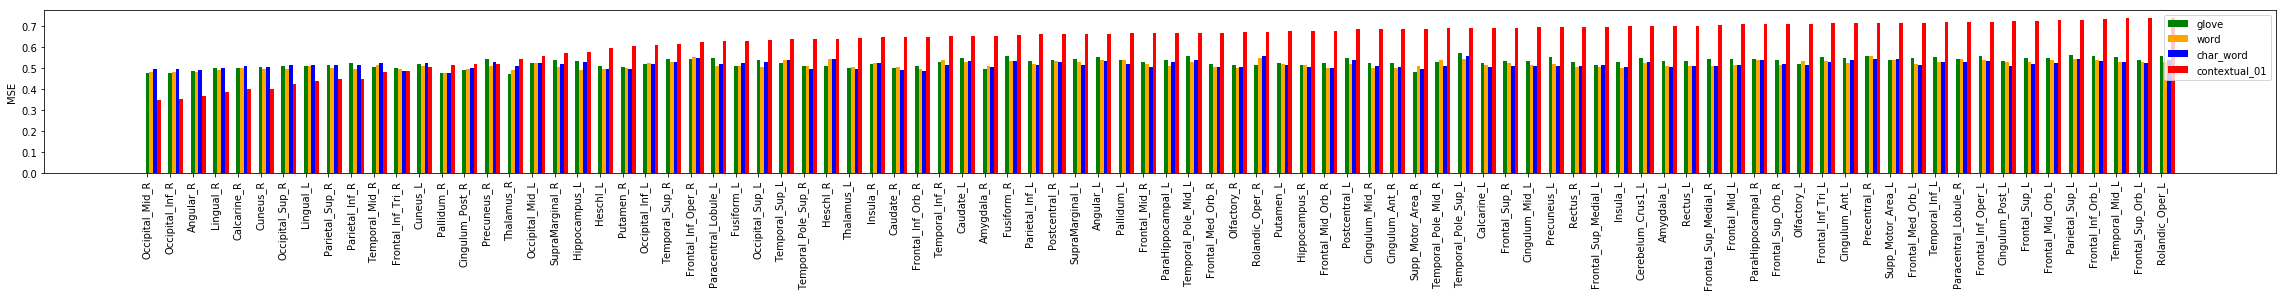

In [27]:
import numpy as np
import matplotlib.pyplot as plt

values = list(area_wise_mse['char_word'].values())

sorted_ind = np.argsort(values)
print(sorted_ind)
N = len(area_wise_mse['contextual_01'].keys())

ind = np.arange(0,N*3,3)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots(figsize=(40,3))
rects1 = ax.bar(ind,np.asarray(list(area_wise_mse['glove'].values()))[sorted_ind], width, color='green',align='center')
rects2 = ax.bar(ind+0.5,np.asarray(list(area_wise_mse['word'].values()))[sorted_ind], width, color='orange',align='center')
rects3 = ax.bar(ind+0.5*2,np.asarray(list(area_wise_mse['char_word'].values()))[sorted_ind], width, color='blue',align='center')
rects4 = ax.bar(ind+0.5*3,np.asarray(list(area_wise_mse['contextual_01'].values()))[sorted_ind], width, color='red',align='center')

                    
# add some text for labels, title and axes ticks
ax.set_ylabel('MSE')
ax.set_xticks(ind)
ax.set_xticklabels(np.asarray(list(area_wise_mse['glove'].keys()))[sorted_ind],rotation='vertical')

ax.legend((rects1,rects2,rects3,rects4),(["glove","word","char_word","contextual_01"]))
plt.show()